In [117]:
import random
from math import dist
import numpy as np

def kmeans(X,k,e):
    random.seed(1)
    centroids = random.sample(X,k)
    centroids_old = centroids
    while True:
        classes = []
        for i in range(len(X)):
            distance = [dist(X[i],centroids[j]) for j in range(k)]
            classes.append(distance.index(min(distance)))
        centroids_new = [(0,0)]*k
        for i in range(len(classes)):
            centroids_new[classes[i]] = np.add(centroids_new[classes[i]],X[i])
        centroids_new = [centroids_new[i]/classes.count(i) for i in range(len(centroids_new))]
        centroids_new = [tuple(centroids_new[i]) for i in range(len(centroids_new))]
        error = np.mean(np.array([dist(centroids[i],centroids_new[i]) for i in range(len(centroids))]))
        if error < e:
            return classes,centroids,centroids_old
        else:
            centroids = centroids_new

def cost(X,k,e):
    classes,centroids,centroids_old = kmeans(X,k,e)
    sum_J = 0
    for i in range(len(X)):
        sum_J += dist(X[i],centroids[classes[i]])
    return sum_J/len(X)

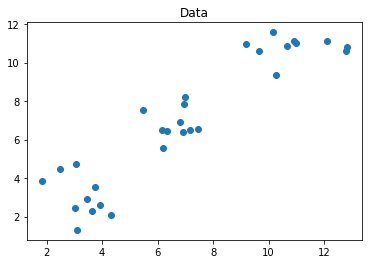

Centroids: 

Old centroid: [(6.17, 6.52), (1.84, 3.85), (3.93, 2.58)]
New centroid: [(10.953, 10.797), (6.646000000000001, 6.8469999999999995), (3.2600000000000002, 3.021)]

Class assignment for each data point: 

[((3.08, 1.31), 2), ((6.95, 7.84), 1), ((10.15, 11.58), 0), ((2.48, 4.48), 2), ((6.17, 6.52), 1), ((9.18, 10.95), 0), ((3.02, 2.44), 2), ((7.0, 8.24), 1), ((12.81, 10.8), 0), ((4.32, 2.07), 2), ((6.92, 6.38), 1), ((10.28, 9.35), 0), ((3.76, 3.56), 2), ((6.33, 6.44), 1), ((12.79, 10.62), 0), ((3.63, 2.29), 2), ((7.18, 6.51), 1), ((12.09, 11.1), 0), ((1.84, 3.85), 2), ((6.19, 5.56), 1), ((11.0, 11.0), 0), ((3.07, 4.73), 2), ((7.45, 6.53), 1), ((10.65, 10.84), 0), ((3.47, 2.9), 2), ((5.48, 7.52), 1), ((10.93, 11.15), 0), ((3.93, 2.58), 2), ((6.79, 6.93), 1), ((9.65, 10.58), 0)]


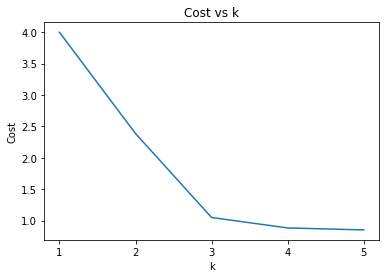

With intuition we can see that k value is 3 and it matches with cost function


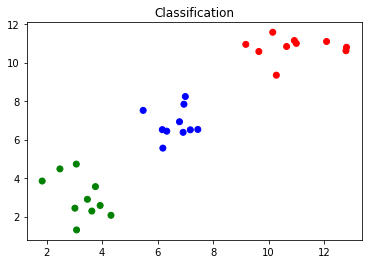

In [146]:
import random
from math import cos,sin,pi
import matplotlib.pyplot as plt
import matplotlib

random.seed(0)

def pointCircle(x,y,r):
    d = random.uniform(0,r)
    theta = random.uniform(0,2*pi)
    return round(x+d*cos(theta),2),round(y+d*sin(theta),2)

data = []
for i in range(10):
    data.append(pointCircle(3,3,2))
    data.append(pointCircle(7,7,2))
    data.append(pointCircle(11,11,2))



plt.scatter(list(zip(*data))[0],list(zip(*data))[1])
plt.title('Data')
plt.show()
print(f'Centroids: \n')
cla,centroid,old = kmeans(data,3,0.0001)
print('Old centroid:',old)
print('New centroid:',centroid)
print(f'\nClass assignment for each data point: \n')
print(list(zip(data,cla)))

cost_value = []
for k in range(1,6):
    cost_value.append(cost(data,k,0.0001))
    

plt.plot([1,2,3,4,5],cost_value)
plt.xticks([1,2,3,4,5])
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('Cost vs k')
plt.show()

print('With intuition we can see that k value is 3 and it matches with cost function')

classes,centroids,old_centroids = kmeans(data,3,0.0001)
colors = ['red','blue','green']
plt.scatter(list(zip(*data))[0], list(zip(*data))[1], c=classes, cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Classification')
plt.show()
